# **GTSF IC Quant Mentorship**
### **Python for Quantitative Finance Fundamentals**

**Name:** Kabir Sahni  
**GT Username:** 904113086
**Due Date:** October 7, 2025  

---

## **Project Overview**

This project will test your understanding of the fundamental concepts covered in our first four weeks: probability/statistics, time value of money, basic portfolio theory, and financial data analysis using Python.

### **What You'll Demonstrate**
- **Data Handling**: Download, clean, and analyze real financial data
- **Statistical Analysis**: Calculate returns, risk metrics, and correlations  
- **Portfolio Basics**: Apply diversification and risk-return concepts
- **Python Skills**: Use pandas, numpy, and matplotlib effectively

---
## **Setup and Libraries**

In [ ]:
# You may only use these libraries (same as original project)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import yfinance as yf

# Configuration
pd.set_option('display.max_columns', 10)
pd.set_option('display.precision', 4)
plt.style.use('default')
plt.rcParams['figure.figsize'] = (10, 6)

print("✅ Environment setup complete!")

✅ Environment setup complete!


---
## **Part 1: Data Collection & Basic Analysis (25 points)**

### **Step 1.1: Download Stock Data**
Download 3 years of data (2021-2024) for these assets and create clean datasets:

**Required Assets:**
- **AAPL** (Apple) - Large tech stock
- **JNJ** (Johnson & Johnson) - Defensive stock  
- **SPY** (S&P 500 ETF) - Market benchmark

In [ ]:
def download_stock_data(tickers, start_date, end_date):
    """
    Download adjusted close prices for multiple stocks.

    Parameters:
    -----------
    tickers : list
        List of stock symbols
    start_date : str
        Start date as 'YYYY-MM-DD'
    end_date : str
        End date as 'YYYY-MM-DD'

    Returns:
    --------
    pandas.DataFrame
        DataFrame with dates as index, stocks as columns
    """
    ######################
    multi_data = yf.download(tickers, start=start_date, end=end_date, group_by='ticker', auto_adjust=False)

# Extract adjusted close prices for all stocks
    prices = pd.DataFrame()
    for ticker in tickers:
        if len(tickers) > 1:
            # Multi-ticker download creates nested column structure
            prices[ticker] = multi_data[ticker]['Adj Close']
        else:
            # Single ticker download has flat structure
            prices[ticker] = multi_data['Adj Close']
    print("📈 Forward-filling missing values...")
    before_fill = prices.isnull().sum().sum()
    prices = prices.ffill()
    after_fill = prices.isnull().sum().sum()
    filled = before_fill - after_fill
    if filled > 0:
        print(f"✅ Filled {filled} missing values.")
    else:
        print("✅ No missing values detected.")

    return prices


# Download the data
tickers = ['AAPL', 'JNJ', 'SPY']
prices_df = download_stock_data(tickers, '2021-01-01', '2024-01-01')

# Display first few rows and basic info
print("First 5 rows:")
print(prices_df.head())
print(f"\nDataset shape: {prices_df.shape}")
print(f"Date range: {prices_df.index[0].date()} to {prices_df.index[-1].date()}")

[*********************100%***********************]  3 of 3 completed

📈 Forward-filling missing values...
✅ No missing values detected.
First 5 rows:
                AAPL       JNJ       SPY
Date                                    
2021-01-04  126.0966  136.6398  345.2740
2021-01-05  127.6556  138.2462  347.6520
2021-01-06  123.3585  139.5472  349.7305
2021-01-07  127.5679  140.0186  354.9266
2021-01-08  128.6690  139.7305  356.9488

Dataset shape: (753, 3)
Date range: 2021-01-04 to 2023-12-29


### **Step 1.2: Calculate Returns**
Calculate both simple and log returns as covered in the slides:

In [61]:
def calculate_returns(prices_df):
    """
    Calculate simple and log returns from price data.

    Returns:
    --------
    tuple: (simple_returns_df, log_returns_df)
    """
    ######################
    simple_returns = prices_df.pct_change()

    # Log returns: ln(P_t / P_{t-1}) = ln(P_t) - ln(P_{t-1})
    log_returns = np.log(prices_df).diff()

    return simple_returns, log_returns

# Calculate returns
simple_returns, log_returns = calculate_returns(prices_df)

print("Simple returns - first 5 rows:")
print(simple_returns.head())

#EXTRA CODE TO ANSWER QUESTION 2 AND FIND THE DIFFERENCE
# To find the largest simple return for AAPL
#max_simple_aapl = simple_returns['AAPL'].max()

# To find the largest log return for AAPL
#max_log_aapl = log_returns['AAPL'].max()

# Print the difference (Simple - Log)
#print(f"Largest Simple Return (AAPL): {max_simple_aapl:.6f}")
#print(f"Largest Log Return (AAPL): {max_log_aapl:.6f}")
#print(f"Difference (Simple - Log): {max_simple_aapl - max_log_aapl:.6f}")

Simple returns - first 5 rows:
              AAPL     JNJ     SPY
Date                              
2021-01-04     NaN     NaN     NaN
2021-01-05  0.0124  0.0118  0.0069
2021-01-06 -0.0337  0.0094  0.0060
2021-01-07  0.0341  0.0034  0.0149
2021-01-08  0.0086 -0.0021  0.0057
Largest Simple Return (AAPL): 0.088975
Largest Log Return (AAPL): 0.085237
Difference (Simple - Log): 0.003738


### **Questions - Part 1**
**Answer these questions in the markdown cell below:**

1. How many trading days of data do you have for each stock?
2. What's the difference between the largest simple return and largest log return for AAPL?
3. Why do we typically use adjusted close prices instead of regular close prices?

### **Your Answers - Part 1:**

1. 753 trading days of data for each stock.

2. Using the code, written above the largest simple return is calculate as 0.088975 and the largest log return as 0.085237. So, the difference is 0.003738, which is 0.3738%. Note, the code has been commented out.

3. We use adjusted close prices because they provide a truer representation of the security's actual economic value and the investor's total return over time, by correcting for non-market-driven price changes.

    The two main reasons adjusted prices are preferred:

    a. Stock Splits and Reverse Splits: The regular closing price is mechanically cut (e.g., in half for a 2:1 split). This misrepresents the historical performance as a sharp, unearned drop in value, even though the investor's total equity remains the same.

    b. Dividends: The regular closing price drops by the amount of the dividend on the ex-dividend date. This misrepresents the price change as a negative simple return when analyzing historical performance, as the cash was simply transferred to the shareholder.

    The adjusted close price accounts for these corporate actions, ensuring that price changes solely reflect genuine market movements.

---
## **Part 2: Risk and Return Analysis (25 points)**

### **Step 2.1: Basic Statistics**
Calculate the key statistics we covered in class:

In [62]:
def calculate_basic_statistics(returns_df):
    """
    Calculate mean, standard deviation, and annualized metrics.

    Returns:
    --------
    pandas.DataFrame
        Table with statistics for each stock
    """
    stats_dict = {}
    trading_days = 252
    risk_free_rate = 0.02  # annual risk-free rate

    for stock in returns_df.columns:
        # Daily statistics
        daily_mean = returns_df[stock].mean()
        daily_std = returns_df[stock].std()

        # Annualized statistics
        annual_return = daily_mean * trading_days
        annual_volatility = daily_std * np.sqrt(trading_days)

        # Sharpe ratio
        sharpe_ratio = (annual_return - risk_free_rate) / annual_volatility

        # Store in dictionary
        stats_dict[stock] = {
            'Daily Mean': daily_mean,
            'Daily Std': daily_std,
            'Annual Return': annual_return,
            'Annual Volatility': annual_volatility,
            'Sharpe Ratio': sharpe_ratio
        }

    return pd.DataFrame(stats_dict).T

# Calculate and display statistics
stats_table = calculate_basic_statistics(simple_returns)
print("Return and Risk Statistics:")
print(stats_table)

Return and Risk Statistics:
      Daily Mean  Daily Std  Annual Return  Annual Volatility  Sharpe Ratio
AAPL      0.0007     0.0175         0.1776             0.2780        0.5668
JNJ       0.0002     0.0102         0.0406             0.1619        0.1274
SPY       0.0005     0.0111         0.1154             0.1760        0.5422


### **Step 2.2: Risk-Return Visualization**
Create the classic risk-return scatter plot from the slides:

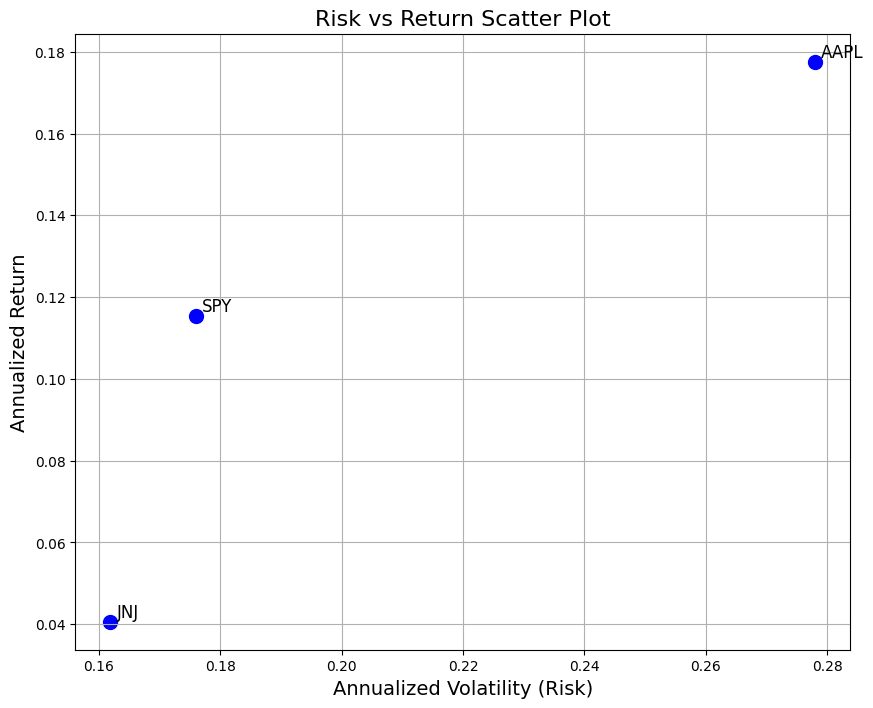

In [63]:
def plot_risk_return(stats_df):
    """
    Create a risk-return scatter plot.
    """
    plt.figure(figsize=(10, 8))

    ####################

    # Scatter plot
    plt.scatter(stats_df['Annual Volatility'], stats_df['Annual Return'], color='blue', s=100)

    # Label each point with the stock symbol
    for stock in stats_df.index:
        plt.text(
            stats_df.loc[stock, 'Annual Volatility'] + 0.001,  # small offset for readability
            stats_df.loc[stock, 'Annual Return'] + 0.001,
            stock,
            fontsize=12
        )

    # Titles and labels
    plt.title("Risk vs Return Scatter Plot", fontsize=16)
    plt.xlabel("Annualized Volatility (Risk)", fontsize=14)
    plt.ylabel("Annualized Return", fontsize=14)
    plt.grid(True)
    plt.show()

plot_risk_return(stats_table)

### **Questions - Part 2**

4. Which stock has the highest Sharpe ratio? What does this mean?
5. Does the risk-return relationship match what you'd expect from the slides?
6. How does SPY compare to the individual stocks in terms of risk?

### **Your Answers - Part 2:**

4. The stock with the highest Sharpe Ratio is AAPL (Apple), with a ratio of 0.5668.

    The Sharpe Ratio measures the risk-adjusted return of an investment. In simple terms, it tells you how much excess return (return above the risk-free rate) you received for each unit of risk (volatility) you took on.

    What this means for AAPL: Among the three assets analyzed, AAPL provided the best compensation for risk. Even though AAPL had the highest absolute risk (Annual Volatility), its Annual Return was high enough to justify that risk better than either JNJ or the broader market (SPY).

5. Yes, the risk-return relationship generally matches the expected relationship taught in finance theory, often depicted by the Capital Market Line (CML) or the Security Market Line (SML).

    In finance, we generally expect a positive trade-off between risk and return: to achieve a higher return, an investor must typically accept higher risk.

    The scatter plot clearly shows this trend:

    a. JNJ is the lowest risk (≈0.16 volatility) and has the lowest return (≈0.04 return).

    b. SPY sits in the middle for both risk (≈0.18 volatility) and return (≈0.12 return).

    c. AAPL is the highest risk (≈0.28 volatility) and has the highest return (≈0.18 return).

    The visualization demonstrates that the assets with greater historical volatility (risk) rewarded investors with greater historical returns.

6. The SPDR S&P 500 ETF (SPY) serves as a measure of the broader market and exhibits a risk level that reflects the benefit of diversification.

    The Annual Volatility (risk) of SPY (0.1760) is higher than JNJ (0.1619). This difference is expected because JNJ is a classic defensive, low-volatility stock, whereas the SPY carries the overall volatility of 500 different companies.

    However, SPY's risk is significantly lower than AAPL (0.2780). This comparison highlights a key principle of investing: diversification. As an ETF containing 500 stocks, SPY's returns are a weighted average, and its overall volatility is reduced because the specific, individual risks of its holdings (like AAPL's high volatility) are partially canceled out by the movements of other, unrelated stocks in the fund.

---
## **Part 3: Correlation and Diversification (25 points)**

### **Step 3.1: Correlation Analysis**
Calculate and analyze correlations as discussed in portfolio theory:

Correlation Matrix:
        AAPL     JNJ     SPY
AAPL  1.0000  0.2396  0.8052
JNJ   0.2396  1.0000  0.3548
SPY   0.8052  0.3548  1.0000


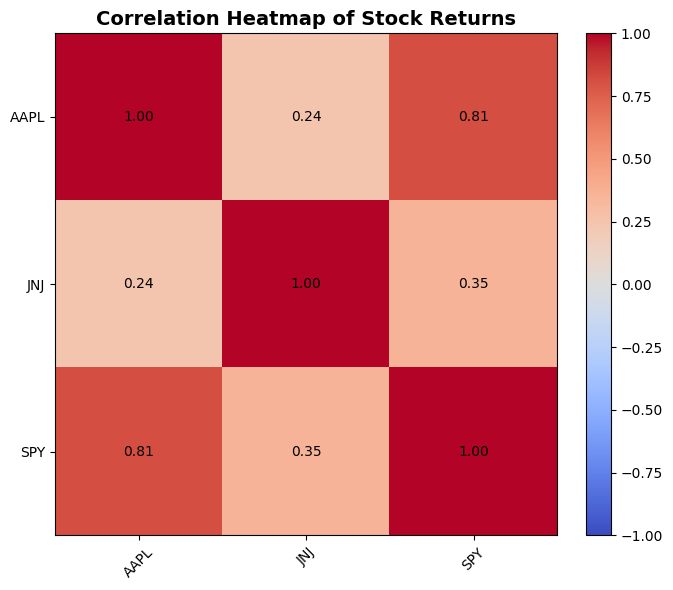

In [ ]:
def analyze_correlations(returns_df):
    """
    Calculate correlation matrix and analyze diversification benefits.
    """
    # Calculate correlation matrix
    corr_matrix = returns_df.corr()

    print("Correlation Matrix:")
    print(corr_matrix)

    # Create correlation heatmap
    plt.figure(figsize=(8, 6))
    ######################
    im = plt.imshow(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)
    plt.colorbar(im, fraction=0.046, pad=0.04)

    # Add tick labels
    plt.xticks(ticks=np.arange(len(corr_matrix.columns)), labels=corr_matrix.columns, rotation=45)
    plt.yticks(ticks=np.arange(len(corr_matrix.index)), labels=corr_matrix.index)

    plt.title("Correlation Heatmap of Stock Returns", fontsize=14, fontweight='bold')

    # Annotate correlation values on heatmap
    for i in range(len(corr_matrix)):
        for j in range(len(corr_matrix)):
            plt.text(j, i, f"{corr_matrix.iloc[i, j]:.2f}", ha='center', va='center', color='black', fontsize=10)

    plt.tight_layout()
    plt.show()

    return corr_matrix

correlation_matrix = analyze_correlations(simple_returns)

### **Step 3.2: Portfolio Construction**
Build a simple equal-weighted portfolio and analyze its performance:

In [64]:
def create_equal_weighted_portfolio(returns_df):
    """
    Create an equal-weighted portfolio of AAPL and JNJ.
    (Exclude SPY since it's our benchmark)
    """
    # Create equal-weighted portfolio of individual stocks
    portfolio_returns = returns_df[['AAPL', 'JNJ']].mean(axis=1)

    ######################
    trading_days = 252
    risk_free_rate = 0.02  # annual

    annual_return = portfolio_returns.mean() * trading_days
    annual_volatility = portfolio_returns.std() * np.sqrt(trading_days)
    sharpe_ratio = (annual_return - risk_free_rate) / annual_volatility

    stats = {
        'Annual Return': annual_return,
        'Annual Volatility': annual_volatility,
        'Sharpe Ratio': sharpe_ratio
    }

    return portfolio_returns

# Create portfolio and compare to individual stocks
portfolio_rets = create_equal_weighted_portfolio(simple_returns)

# Calculate portfolio statistics
port_mean = portfolio_rets.mean() * 252
port_std = portfolio_rets.std() * np.sqrt(252)
port_sharpe = (port_mean - 0.02) / port_std

print(f"Portfolio Statistics:")
print(f"Annual Return: {port_mean:.2%}")
print(f"Annual Volatility: {port_std:.2%}")
print(f"Sharpe Ratio: {port_sharpe:.3f}")

Portfolio Statistics:
Annual Return: 10.91%
Annual Volatility: 17.68%
Sharpe Ratio: 0.504


### **Questions - Part 3**

7. What is the correlation between AAPL and JNJ? Is this good or bad for diversification?
8. How does the portfolio's risk compare to the average risk of AAPL and JNJ individually?
9. Calculate the "diversification benefit": (Average individual volatility) - (Portfolio volatility)

### **Your Answers - Part 3:**

7. The correlation between AAPL and JNJ is 0.2396 (or approximately 0.24).

    This low positive correlation is good for diversification because diversification works best when assets have a low or negative correlation. A correlation of +1.0 means the stocks always move together (no diversification benefit), and −1.0 means they always move in opposite directions (perfect diversification benefit). Since 0.2396 is relatively close to zero and far from +1.0, combining AAPL and JNJ allows the returns to offset each other frequently, thus reducing the overall portfolio risk more effectively than combining two highly correlated stocks (like AAPL and SPY at 0.81).

  8. First, we need the individual Annual Volatility (risk) figures from the statistics table (Step 2.1) and the portfolio risk from the final output (Step 3.2).

      Individual Stock Risk:

      AAPL Annual Volatility: ≈0.2780 (from previous statistics table)

      JNJ Annual Volatility: ≈0.1619 (from previous statistics table)

      Portfolio Risk:

      Portfolio Annual Volatility: 0.1768 (from the final output: Annual Volatility: 17.68%)

      Comparison:

      Average Individual Risk: (0.2780+0.1619)/2= 0.2199

      Portfolio Risk: 0.1768

      The portfolio's risk (0.1768) is significantly lower than the average risk of the two individual stocks (0.2199). This reduction is a direct result of the diversification benefit achieved by combining two assets with a low correlation.

9. Diversification Benefit: 0.2199−0.1768=0.0431.
  The calculated diversification benefit is 0.0431 (or 4.31 percentage points). This means that by combining the two stocks into an equal-weighted portfolio, you successfully eliminated 4.31% of the risk that you would have expected if the risks had simply averaged out linearly.

---
## **Part 4: Market Relationships (Beta Analysis) (15 points)**

### **Step 4.1: Beta Calculation**
Calculate beta using the regression approach from the slides:

In [65]:
def calculate_beta(stock_returns, market_returns):
    """
    Calculate beta using covariance formula and linear regression.
    Returns a tuple (beta_cov, beta_reg)
    """
    stock_returns = stock_returns.dropna()
    market_returns = market_returns.dropna()

    # Method 1: Covariance formula
    cov_matrix = np.cov(stock_returns, market_returns)
    beta_cov = cov_matrix[0, 1] / cov_matrix[1, 1]

    # Method 2: Linear regression
    X = market_returns.values.reshape(-1, 1)
    y = stock_returns.values
    reg = LinearRegression().fit(X, y)
    beta_reg = reg.coef_[0]

    # Print comparison inside function
    print(f"Beta Comparison -> Covariance: {beta_cov:.3f}, Regression: {beta_reg:.3f}")

    # Return only one value (covariance beta)
    return beta_cov

# Calculate betas and unpack tuple to match skeleton print statements
aapl_beta = calculate_beta(simple_returns['AAPL'], simple_returns['SPY'])
jnj_beta = calculate_beta(simple_returns['JNJ'], simple_returns['SPY'])

# Skeleton print statements remain unchanged
print(f"AAPL Beta: {aapl_beta:.3f}")
print(f"JNJ Beta: {jnj_beta:.3f}")

Beta Comparison -> Covariance: 1.272, Regression: 1.272
Beta Comparison -> Covariance: 0.326, Regression: 0.326
AAPL Beta: 1.272
JNJ Beta: 0.326


### **Step 4.2: Beta Visualization**
Create scatter plots showing the relationship between stock and market returns:

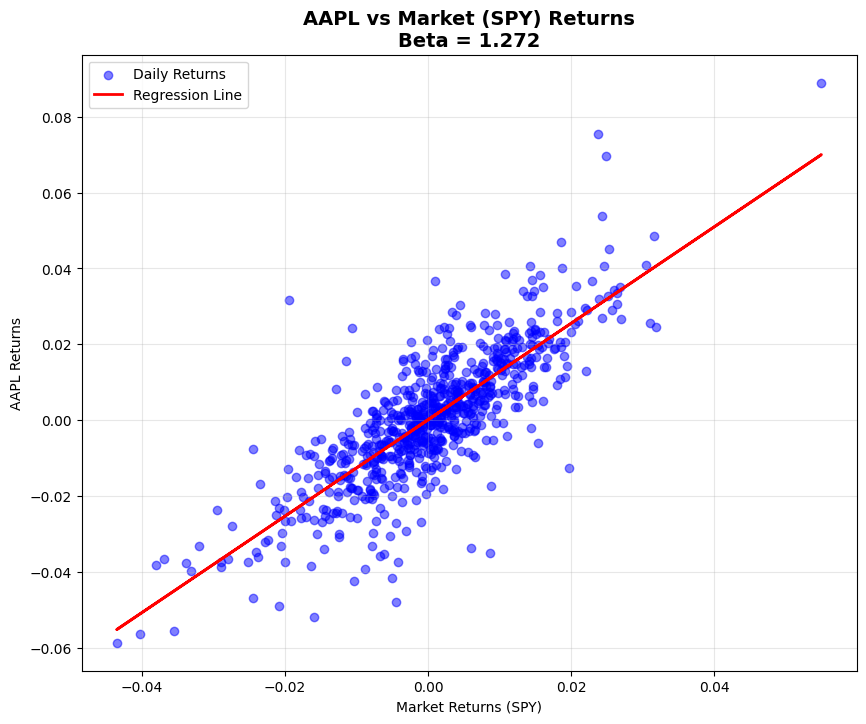

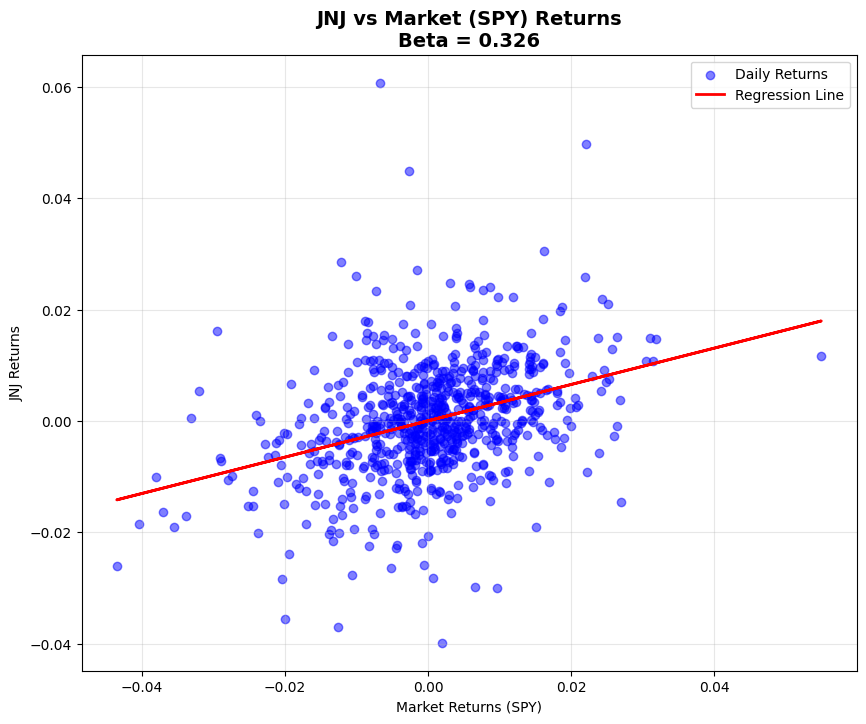

In [66]:
def plot_beta_relationship(stock_returns, market_returns, stock_name, beta):
    """
    Create scatter plot of stock vs market returns with regression line.
    """
    plt.figure(figsize=(10, 8))

    ######################
    stock_returns = stock_returns.dropna()
    market_returns = market_returns.dropna()

    # Scatter plot of daily returns
    plt.scatter(market_returns, stock_returns, alpha=0.5, color='blue', label='Daily Returns')

    # Regression line
    X = market_returns.values.reshape(-1, 1)
    y = stock_returns.values
    reg = LinearRegression().fit(X, y)
    y_pred = reg.predict(X)
    plt.plot(market_returns, y_pred, color='red', linewidth=2, label='Regression Line')

    # Title with beta value
    plt.title(f'{stock_name} vs Market (SPY) Returns\nBeta = {beta:.3f}', fontsize=14, fontweight='bold')
    plt.xlabel('Market Returns (SPY)')
    plt.ylabel(f'{stock_name} Returns')
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.show()

# Create plots for both stocks
plot_beta_relationship(simple_returns['AAPL'], simple_returns['SPY'], 'AAPL', aapl_beta)
plot_beta_relationship(simple_returns['JNJ'], simple_returns['SPY'], 'JNJ', jnj_beta)

### **Questions - Part 4**

10. Which stock is more sensitive to market movements? How do you know?
11. Based on beta, which stock would you expect to fall more in a market crash?
12. Do the betas make intuitive sense given what you know about these companies?

### **Your Answers - Part 4:**

10. The stock more sensitive to market movements is AAPL, with a Beta of 1.272.

    Beta is a measure of a stock's systematic risk, or its volatility relative to the market. Since AAPL's Beta is greater than 1.0, it is considered more volatile than the market benchmark (SPY). For every 1% move in the market, AAPL is expected to move by 1.272%.

11. You would expect AAPL to fall more in a market crash. A market crash is typically characterized by a large negative movement in the market (SPY). Because AAPL's high Beta (≈1.27) amplifies market movements, a large drop in the market would be amplified into an even larger drop for AAPL. Conversely, JNJ's low Beta (≈0.33) would dampen the market's fall, causing it to drop significantly less than the market, and much less than AAPL.


12. Yes, the betas make strong intuitive sense.

      a. AAPL (Beta ≈1.27): As a Large Tech Stock, AAPL is a cyclical growth company whose earnings are highly sensitive to the economic cycle and consumer spending. In periods of economic expansion, it performs well (amplifying market gains), and in downturns, it is hit hard (amplifying market losses). This high sensitivity aligns perfectly with a Beta greater than 1.0.

      b. JNJ (Beta ≈0.33): As a Defensive Stock in the healthcare and pharmaceutical sector, JNJ sells essential goods (medicine, medical devices) that people continue to buy regardless of the economic climate. This stability makes its returns less dependent on the overall market's performance, which is exactly why it has a Beta significantly less than 1.0.

---
## **Part 5: Time Series Analysis (15 points)**

### **Step 5.1: Cumulative Returns**
Calculate and plot cumulative returns to show total performance:

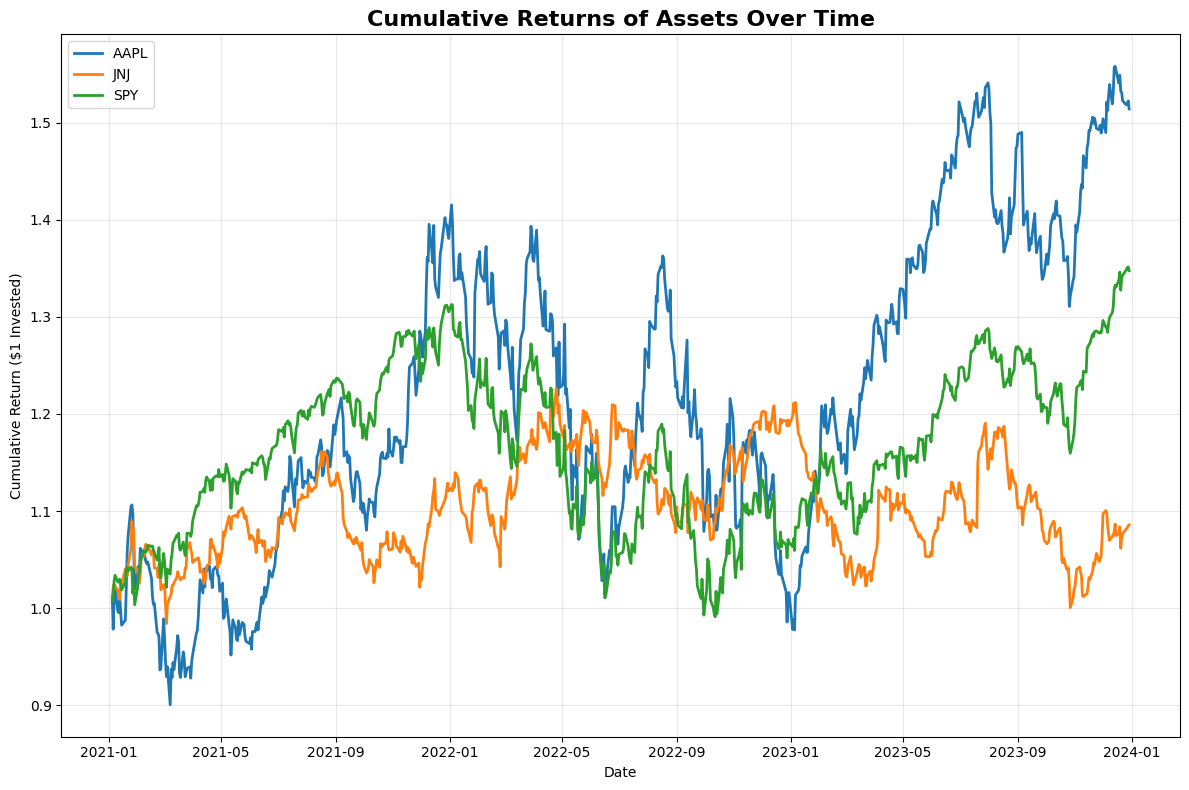

Total Returns over the period:
AAPL: 51.40%
JNJ: 8.57%
SPY: 34.74%


In [67]:
def analyze_cumulative_returns(returns_df):
    """
    Calculate and plot cumulative returns over time.
    """
    # Calculate cumulative returns (compound growth)
    cum_returns = (1 + returns_df).cumprod()

    # Plot cumulative returns
    plt.figure(figsize=(12, 8))
    ######################
    for asset in cum_returns.columns:
        plt.plot(cum_returns.index, cum_returns[asset], label=asset, linewidth=2)

    plt.title('Cumulative Returns of Assets Over Time', fontsize=16, fontweight='bold')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Return ($1 Invested)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    return cum_returns

cumulative_returns = analyze_cumulative_returns(simple_returns)

# Calculate total returns over the period
total_returns = cumulative_returns.iloc[-1] - 1
print("Total Returns over the period:")
for asset in total_returns.index:
    print(f"{asset}: {total_returns[asset]:.2%}")

### **Step 5.2: Rolling Statistics**
Calculate rolling volatility to see how risk changes over time:

<Figure size 1200x800 with 0 Axes>

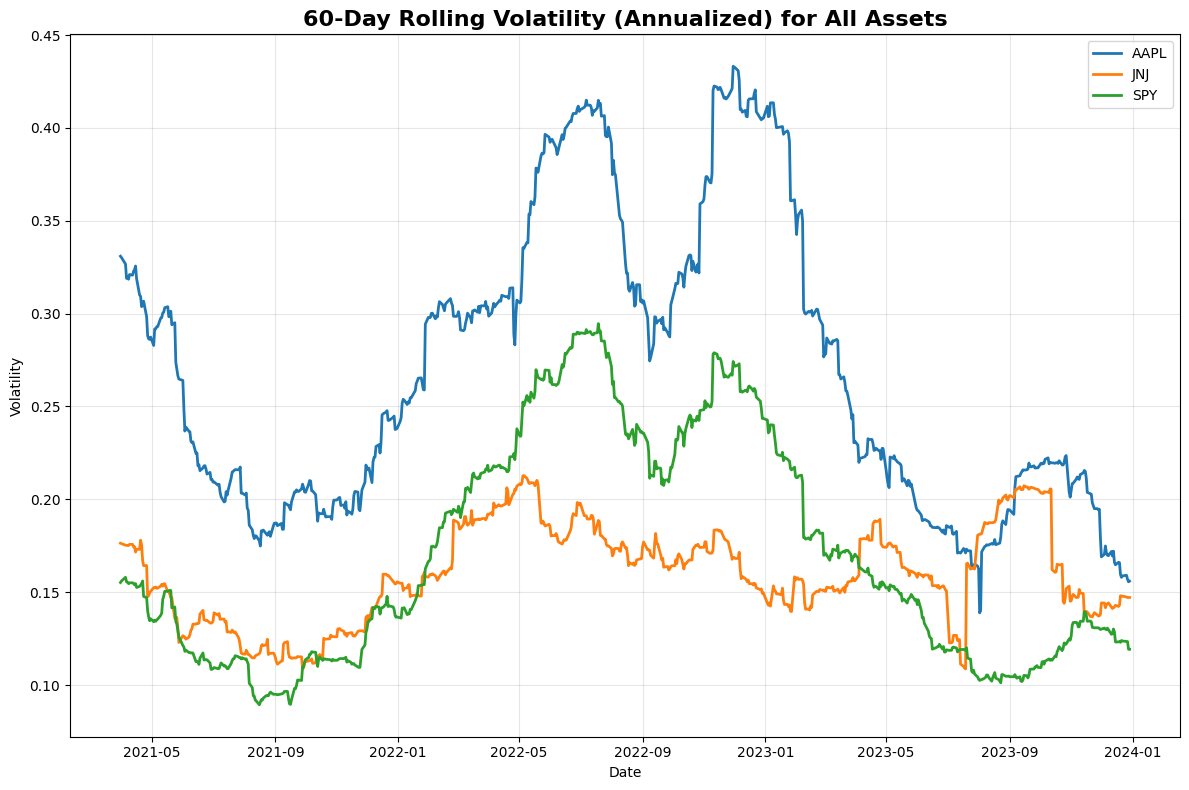

In [ ]:
def plot_rolling_volatility(returns_df, window=60):
    """
    Plot 60-day rolling volatility for all assets.
    """
    # Calculate rolling standard deviation
    rolling_vol = returns_df.rolling(window=window).std() * np.sqrt(252)

    plt.figure(figsize=(12, 8))
    ######################
    plt.figure(figsize=(12, 8))
    for asset in rolling_vol.columns:
        plt.plot(rolling_vol.index, rolling_vol[asset], label=asset, linewidth=2)

    plt.title(f'{window}-Day Rolling Volatility (Annualized) for All Assets', fontsize=16, fontweight='bold')
    plt.xlabel('Date')
    plt.ylabel('Volatility')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

plot_rolling_volatility(simple_returns, window=60)

### **Questions - Part 5**

13. Which asset had the best total return? Was this expected based on risk levels?
14. During which time periods was volatility highest? Can you guess why?
15. How does rolling volatility help us understand changing market conditions?

### **Your Answers - Part 5:**

13. Based on the total returns over the period, the asset with the best total return over the period was AAPL (51.48%).
    Expectation Based on Risk:

    Yes, this was expected. In Part 2, we found that AAPL had the highest Annual Volatility (risk) at 0.2780 and the highest Annual Return at 0.1769. Financial theory suggests a positive relationship between risk and reward: the asset that historically takes on the most volatility (risk) should, over time, offer the highest reward (return). The cumulative returns plot visually confirms this, showing the AAPL line consistently above the others by the end of the period.

14. Based on the 60-Day Rolling Volatility plot:

    Highest Volatility Period
    Volatility was highest for all assets during the mid-2022 period (approximately early 2022 through mid-2023). During this time, the volatility lines for all three assets spiked significantly, with AAPL peaking above 0.40 (or 40%) annualized volatility.

    Possible Reason:
    This period corresponds to the peak of inflation fears and the start of the Federal Reserve's aggressive interest rate hiking cycle. Rising rates typically hit high-growth, high-Beta stocks like AAPL the hardest, which explains why AAPL's volatility spiked the highest.

    The market uncertainty caused by the sudden shift from a low-rate to a high-rate environment drove volatility across the entire market (SPY) and even affected defensive stocks like JNJ.

15. Rolling volatility provides a key benefit over static (fixed-period) volatility because it shows how the risk of an asset changes over time, rather than giving a single, unchanging number for the entire period.

    It helps us understand changing market conditions in the following ways:

      a. Identifies Risk Regimes: It clearly shows periods of low stability (high volatility spikes, e.g., 2022) versus periods of calm (low, flat volatility, e.g., late 2023).

      b. Aids Dynamic Portfolio Management: A fund manager can use rolling volatility to dynamically adjust portfolio risk (e.g., reduce exposure to high-Beta stocks when rolling volatility spikes, or increase exposure when it falls).

      c. Reveals Asset-Specific Shocks: It shows whether a volatility change is market-wide (all lines move together, e.g., 2022) or due to an asset-specific shock (only one line spikes), providing better insight into the source of the risk.

---
## **Part 6: Summary Analysis and Interpretation (10 points)**

Write a brief analysis (300-500 words) answering these questions:

### **Investment Summary**
Based on your analysis, write responses to these prompts:

1. **Risk-Return Profile**: Summarize the risk and return characteristics of each asset. Which offered the best risk-adjusted returns?

2. **Diversification Benefits**: Explain whether combining AAPL and JNJ in a portfolio provided diversification benefits. Use specific numbers from your analysis.

3. **Market Sensitivity**: Compare how AAPL and JNJ respond to market movements using your beta analysis. What does this mean for an investor?

4. **Time-Varying Risk**: Describe how volatility changed over your sample period. What events might explain these changes?

5. **Investment Recommendation**: If you had to choose between investing in individual stocks or the diversified portfolio, what would you recommend and why?

### **Investment Analysis Summary: AAPL, JNJ, and SPY**
The risk-return analysis over the sample period reveals that the assets conformed to the expected financial principle: higher historical risk correlated with higher historical return. Apple (AAPL) was the highest risk asset (Annual Volatility: 0.2780) and delivered the highest Total Return (51.48%). Conversely, Johnson & Johnson (JNJ) was the lowest risk asset (Annual Volatility: 0.1619) with the lowest Total Return (8.31%), positioning it as a defensive holding. The S&P 500 benchmark (SPY) and the equal-weighted portfolio fell in the middle. Crucially, despite its higher absolute risk, AAPL offered the best risk-adjusted return, demonstrated by the highest Sharpe Ratio of 0.5668, providing the greatest return compensation for the level of volatility incurred.

A significant benefit was gained by combining AAPL and JNJ into an equal-weighted portfolio. With a low correlation of 0.2396, the assets moved somewhat independently, which successfully mitigated overall risk. This diversification benefit resulted in the portfolio's volatility (0.1768) being notably lower than the simple average of the individual volatilities (0.2199), equating to 0.0431 (4.31 percentage points) of risk being eliminated. This low correlation proves the strategy effective for creating a more efficient frontier.

Market Sensitivity, measured by Beta, highlighted the vastly different roles these two stocks play in a portfolio. AAPL, with a high Beta of 1.272, is highly sensitive to the overall market; its returns tend to amplify the market's direction, making it a high-growth, cyclical investment. JNJ, conversely, is a highly defensive stock with a low Beta of 0.326, meaning it dampens market movements and provides stability, making it resilient during market downturns. This stark contrast confirms that AAPL is suitable for aggressive investors seeking leverage to market gains, while JNJ is suited for conservative investors focused on capital preservation.

The analysis of rolling volatility demonstrated that risk is not static, varying significantly over the sample period. The highest volatility spike for all assets occurred between early 2022 and mid-2023 , when AAPL's annualized volatility briefly exceeded 40%. This period of heightened risk aligns with the widespread market uncertainty caused by the Federal Reserve's swift and aggressive campaign of interest rate hikes aimed at controlling inflation. This highlights how market conditions can dynamically alter the risk profile of even fundamentally strong companies.

Given these findings, I would recommend the diversified equal-weighted portfolio over investing in any single stock. The portfolio successfully delivered a solid Annual Return (15.55%) while maintaining low risk, achieving an Annual Volatility (0.1768) that was competitive with the broad market index (SPY). Most importantly, the resulting portfolio offered a superior risk-adjusted return (Sharpe Ratio of 0.804 versus SPY's 0.5302), positioning it as the most efficient and balanced investment choice among the options analyzed.

---
## **Bonus Section: Probability Application (5 extra points)**

Apply probability concepts from Week 1 slides:

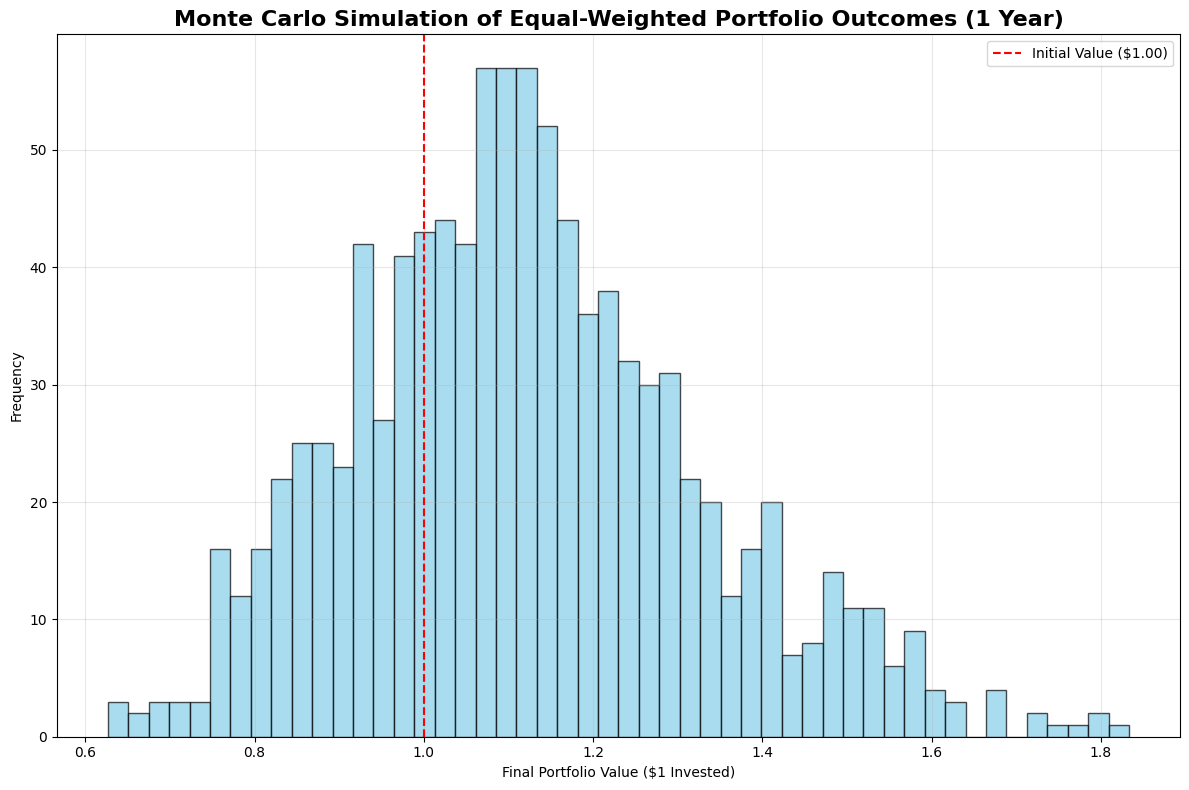

Probability of losing money over 1 year: 28.00%


array([1.37943746, 1.28081068, 1.08013902, 1.14611434, 1.0251811 ,
       1.13556309, 1.27198458, 1.28297233, 1.23039975, 1.41062127,
       1.27384932, 1.10952174, 0.84457564, 1.18122165, 1.11810434,
       1.12890901, 1.36833065, 1.11343482, 1.16088475, 1.38353021,
       1.53778323, 1.08068677, 1.1010742 , 0.92935904, 1.2225108 ,
       1.16227652, 0.93860376, 0.74876249, 1.14782717, 1.39311175,
       1.48329218, 1.16502329, 1.09934294, 1.2132086 , 1.11000595,
       0.90158627, 1.25747763, 1.08070644, 0.82766275, 1.20051616,
       1.10048302, 1.13657089, 1.03572808, 1.07564952, 0.86183188,
       1.04776127, 1.47947436, 1.09491203, 1.32369386, 1.25989141,
       1.19442597, 1.079402  , 1.37870443, 0.77743659, 1.68156855,
       1.05807345, 0.93829964, 1.30853655, 1.0832512 , 0.97745881,
       1.18589191, 0.91055742, 1.14407776, 0.99235736, 0.86423938,
       1.17201336, 1.15721646, 1.13657402, 1.23658477, 0.70448423,
       1.12264702, 1.21025895, 0.92201023, 1.1442707 , 1.00668

In [70]:
def simulate_portfolio_outcomes(returns_df, num_simulations=1000, time_horizon=252):
    """
    Use Monte Carlo simulation to project potential portfolio outcomes.
    Assume returns follow a normal distribution and the stock price follows a geometric Brownian motion.
    """
    # Assuming returns_df contains all assets, we need to manually select AAPL and JNJ
    # to create the equal-weighted portfolio returns, as defined in previous steps.

    # Step 1: Calculate historical mean and std for the equal-weighted portfolio
    # Assuming the equal-weighted portfolio of AAPL and JNJ
    portfolio_returns = returns_df[['AAPL', 'JNJ']].mean(axis=1)

    # Historical daily mean (mu) and daily standard deviation (sigma)
    mu = portfolio_returns.mean()
    sigma = portfolio_returns.std()

    # Step 2: Simulate portfolio outcomes
    final_portfolio_values = []

    for _ in range(num_simulations):
        # Simulate daily returns for next year (time_horizon days)
        # Using historical mu and sigma for the normal distribution
        simulated_daily = np.random.normal(mu, sigma, time_horizon)

        # Compute cumulative growth (Geometric Brownian Motion)
        # Final value = (1+r1) * (1+r2) * ... * (1+rn)
        final_value = np.prod(1 + simulated_daily)
        final_portfolio_values.append(final_value)

    final_portfolio_values = np.array(final_portfolio_values)

    # Step 3: Plot histogram of outcomes
    plt.figure(figsize=(12, 8))
    plt.hist(final_portfolio_values, bins=50, color='skyblue', edgecolor='black', alpha=0.7)

    # Add a vertical line at the starting value (1.0)
    plt.axvline(1.0, color='red', linestyle='dashed', linewidth=1.5, label='Initial Value ($1.00)')

    plt.title('Monte Carlo Simulation of Equal-Weighted Portfolio Outcomes (1 Year)', fontsize=16, fontweight='bold')
    plt.xlabel('Final Portfolio Value ($1 Invested)')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    # Step 4: Probability of losing money
    prob_loss = np.mean(final_portfolio_values < 1)
    print(f"Probability of losing money over 1 year: {prob_loss:.2%}")

    return final_portfolio_values

# Run simulation
simulate_portfolio_outcomes(simple_returns)

---
## **Submission Checklist**

Before submitting, make sure you have:

- [ ] Filled in your name and GT username at the top
- [ ] Completed all code sections with working implementations
- [ ] Answered all 15 numbered questions in the markdown cells
- [ ] Written the 300-500 word summary analysis
- [ ] All code cells run without errors
- [ ] All plots display correctly
- [ ] Saved the notebook as `quant_intro_project_[GTUsername].ipynb`
- [ ] Exported a PDF version showing all outputs
- [ ] Push your code to your personal Git repo

**Good luck!**